# Linear Regression

**Overview**

The code is an implementation of a linear regression model to predict the housing prices using the [**kc_house dataset**](https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Regression/kc_house_data.csv).<br><br> Linear regression is a statistical approach used to model the relationship between a dependent variable (target) and one or more independent variables (features). In this case, the **target variable** is the **housing price**, while the **features** are the number of **bedrooms, bathrooms, living area, lot area, floors, waterfront, view, condition, and grade** of the property.

The code uses the popular scikit-learn library for machine learning in Python to preprocess the data, split it into train and test sets, train the linear regression model, and evaluate its performance. The evaluation metrics used in the code include R-squared value, mean squared error, mean absolute error, and root mean squared error.

The code also includes functions to plot the actual vs predicted values, residuals, and the distribution of the residuals. The residuals are the differences between the actual and predicted values, and their distribution can reveal insights into the performance of the model.

In [1]:
# Import the required libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the required libraries for machine learning
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
def load_data(url):
    """
    Loads data from a given url into a pandas dataframe.
    """
    df = pd.read_csv(url)
    return df

In [3]:
def clean_data(df):
    """
    Cleans the given dataframe by removing rows with incorrect data
    and dropping unnecessary columns.
    """
    # Remove rows with incorrect data
    df = df.drop(df[(df['bedrooms'] == 33) & (df['bathrooms'] == 1.75)].index)
    df = df.drop(df[(df['bedrooms'] == 0) & (df['price'] == 1095000)].index)
    df = df.drop(df[(df['bedrooms'] == 0) & (df['price'] == 380000)].index)
    df = df.drop(df[(df['bedrooms'] == 33) & (df['sqft_living'] == 1620)].index)
    df = df.drop(df[(df['sqft_lot'] == 1600000) & (df['bathrooms'] == 1) & (df['sqft_living'] == 1600)].index)

    # Drop the "id" and "date" columns
    df = df.drop(['id', 'date'], axis=1)

    # Extract desired features
    df = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'price']]

    return df

In [4]:
def split_data(df, test_size=0.2, random_state=42):
    """
    Splits the given dataframe into train and test sets.
    """
    # Define X and y
    X = df.drop('price', axis=1)
    y = df['price']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [5]:
def train_model(X_train, y_train):
    """
    Creates a linear regression model and fits it to the training data.
    """
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model

In [6]:
def evaluate_model(model, X_test, y_test):
    """
    Makes predictions on the test data and calculates relevant metrics.
    """
    y_pred = model.predict(X_test)

    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mse)

    return y_pred, r_squared, mse, mae, rmse

In [7]:
def plot_predictions(y_test, y_pred):
    """
    Plots the actual vs predicted values and the regression line.
    """
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.show()

In [10]:
def plot_residuals(y_test, y_pred):
    """
    Plots the residuals of the model.
    """
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title("Residual Plot")
    plt.xlabel("Predicted Prices")
    plt.ylabel("Residuals")
    plt.show()

In [12]:
def plot_residual_distribution(y_test, y_pred):
    """
    Plots the distribution of the residuals.
    """
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

In [13]:
# Set the dataset URL
url = "https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Regression/kc_house_data.csv"

# Load the dataset
df = load_data(url)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
# Clean the data
df = clean_data(df)

In [17]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,price
0,3,1.00,1180,5650,1.0,0,0,3,7,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,510000.0


In [18]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = split_data(df)

In [19]:
# Train the linear regression model
model = train_model(X_train, y_train)

In [20]:
# Evaluate the model on the test set
y_pred, r_squared, mse, mae, rmse = evaluate_model(model, X_test, y_test)


In [21]:
# Print the evaluation metrics
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


R-squared: 0.6227616194975862
Mean Squared Error: 53728758042.5083
Mean Absolute Error: 151144.82030165262
Root Mean Squared Error: 231794.6462766306


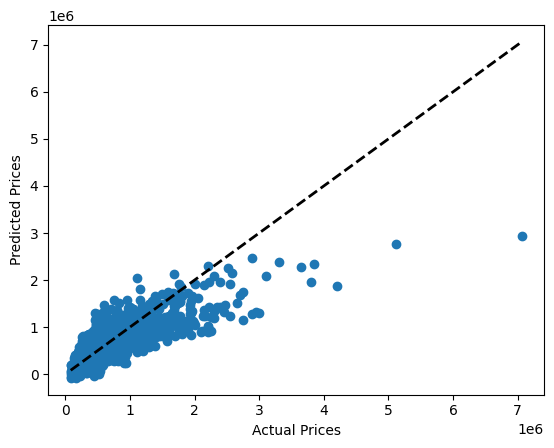

In [22]:
# Plot the actual vs predicted values
plot_predictions(y_test, y_pred)



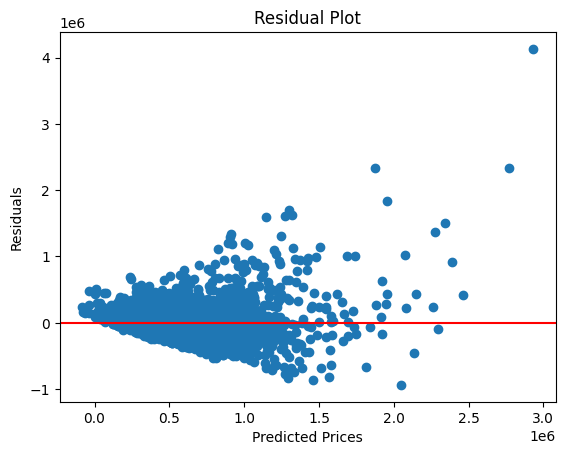

In [23]:
# Plot the residuals
plot_residuals(y_test, y_pred)



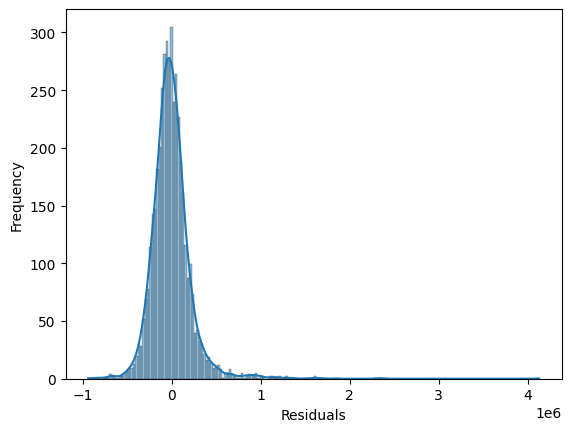

In [24]:
# Plot the distribution of the residuals
plot_residual_distribution(y_test, y_pred)

The model has an **R-squared value of 0.62**, which is not bad given that no hyperparameter tuning or cross-validation has been performed. However, the mean squared error and mean absolute error are on the higher side, indicating that the model could be further improved.